![bts_logo](bts_logo.png)
# Assignment II
### *By Ennio Maldonado*
---
Second graded assignment of the course. There is not only one way to do some of the sections. Feel free to add some extra sections if you consider them interesting!

In [4]:
# Preliminaries:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.stats.weightstats import ztest

1. Generate a list/array with the height of the population of Barcelona (1620343 inhab), where the mean is 173 cm and the standard deviation is 9.5 cm. Height is normally distributed.

In [5]:
mu = 173
sigma = 9.5
height = pd.DataFrame(np.random.normal(mu, sigma, 1620343), columns=['height'])
height.head()

,height
0,166.063472
1,180.704382
2,181.372956
3,164.656938
4,168.138015


2. Plot the distribution of the population (not the mean)

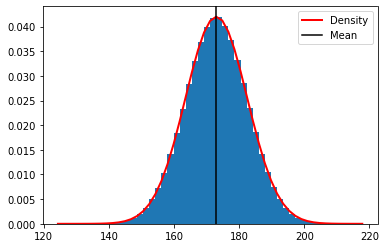

In [6]:
count, bins, ignored = plt.hist(height, 50, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r', label='Density'),
plt.axvline(x=173, color='k', label='Mean')
plt.legend()
plt.show()

3. How many cases are considered outliers? (we can use the definition of being above/below 1.5 x IQR, or 3 x IQR if we want to be more restrictive)

In [7]:
Q75 = np.percentile(height.height, 75)
Q25 = np.percentile(height.height, 25)
IQR = Q75 - Q25
minor = [Q25 - 1.5*IQR, Q75 + 1.5*IQR]
major = [Q25 - 3*IQR, Q75 + 3*IQR]

height = height.assign(minor_out = lambda x:((x['height'] > minor[0]) & (x['height'] < minor[1])))
height = height.assign(major_out = lambda x:((x['height'] > major[0]) & (x['height'] < major[1])))
minor_outliers = height.minor_out.value_counts()
major_outliers = height.major_out.value_counts()

print(f"There are {minor_outliers[0]} minor outliers (1.5 * IQR) and {major_outliers[0]} major outliers (3 * IQR) in the data")

There are 11197 minor outliers (1.5 * IQR) and 2 major outliers (3 * IQR) in the data


4. Generate a sample of 50 individuals, and using the Z-test, test $H_0 = 173$ against $H_1 \neq 173$. Use a confidence of 90%, 95%, 95.5% and 99%. Do you get different conclusions?

Remember: Confidence (and significance) are arbitrary values!! You use them as a threshold, but you never see them in the functions! Is what you use to decide if the values are extreme enough given some amount of risk

In [8]:
# Sample
sample_height = height.height.sample(50, replace=True)

In [9]:
# Define a function to test for confidence levels.
def confidence(zscore):
    if zscore[0] < 1.28:
        h0 = [1, 0]
    elif ((zscore[0] > 1.28) & (zscore[0] < 1.645)):
        h0 = [0, 80]
    elif ((zscore[0] > 1.645) & (zscore[0] < 1.96)):
        h0 = [0, 90]
    elif ((zscore[0] > 1.96) & (zscore[0] < 2.58)):
        h0 = [0, 95]
    elif zscore[0] > 2.58:
        h0 = [0, 99]
    return h0


In [11]:
ztest??

In [41]:
zscore = ztest(sample_height, value= 173)
hzero = confidence(zscore)

if hzero  == [1, 0]:
    print(f"Value of 173 has a Z-score of {zscore} for the null Hypothesis, meaning that we cannot reject the null that 173 is the mean at any confidence level.")
elif hzero  == [0, 80]:
    print(f"Value of 173 has a Z-score of {zscore} for the null Hypothesis, meaning that we can reject the null with a confidence of 80%.")
elif hzero  == [0, 90]:
    print(f"Value of 173 has a Z-score of {zscore} for the null Hypothesis, meaning that we can reject the null with a confidence of 90%.")
elif hzero  == [0, 95]:
    print(f"Value of 173 has a Z-score of {zscore} for the null Hypothesis, meaning that we can reject the null with a confidence of 95%.")
elif hzero  == [0, 99]:
        print(f"Value of 173 has a Z-score of {zscore} for the null Hypothesis, meaning that we can reject the null with a confidence of 99%.")


Value of 173 has a Z-score of (0.2776474222375881, 0.7812830250905322) for the null Hypothesis, meaning that we cannot reject the null that 173 is the mean at any confidence level.


4.1 Draw the Z-test for the population mean

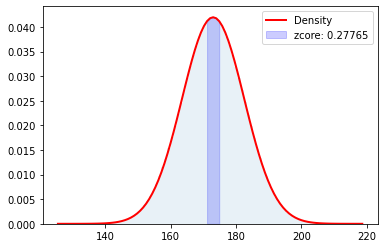

In [42]:
# Plotting the normal with mu = 173 and sigma = 9.5
count, bins, ignored = plt.hist(height.height, 100, density=True, alpha=0.1)
normal_form = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) )
plt.plot(bins, normal_form, linewidth=2, color='r', label='Density'),

#Adding the shading for the zscore region
bins_z = np.array([bin for bin in bins if ((bin > (mu - zscore[0] * sigma)) &
                                  (bin < (mu + zscore[0] * sigma)))])
normal_form_z = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins_z - mu)**2 / (2 * sigma**2) )
plt.fill_between(bins_z,normal_form_z,0, alpha= 0.2, color='b', label=f"zcore: {round(zscore[0],5)}")

#Show plot
plt.legend()
plt.show()


4.2 Does it change a lot if we test $H_0 = 173$ against $H_1 > 173$ ? Explain the differences

In [43]:
zscore_larger = ztest(sample_height, value= 173, alternative='larger')
print(f"Two-sided --> difference in means not equal to value: {zscore[1]}")
print(f"larger --> difference in means larger than value: {zscore_larger[1]}")
print("\nA smaller zscore in a one sided test is expected compared to a two sided test, in this case the one sided test is aprox half of the two sided test, which means that the distribution of the sample is aprox normal with mu close to 173.")

Two-sided --> difference in means not equal to value: 0.7812830250905322
larger --> difference in means larger than value: 0.3906415125452661

A smaller zscore in a one sided test is expected compared to a two sided test, in this case the one sided test is aprox half of the two sided test, which means that the distribution of the sample is aprox normal with mu close to 173.


5. Now we are going to generate 10000 samples of 50 individuals. For each of them, I want to apply the previous procedure, Z-test with 90, 95, 95.5 and 99% confidence! At the end, I want to see how many times I accepted $H_0$ and how many times I rejected it (which means I assume $H_1$ is happening) for each of them. Does it fit what we should expect?

Show it graphically

In [44]:
# Generate samples
n = 10000
exp_sample_height = np.array([height.height.sample(50, replace=True) for i in range(n)])

Total times H0 was not rejected [1, 0]: 1
0    9008
dtype: int64

Total times H0 was rejected and with which confidence [0, xx]: 1
80    472
90    235
95    218
99     67
dtype: int64


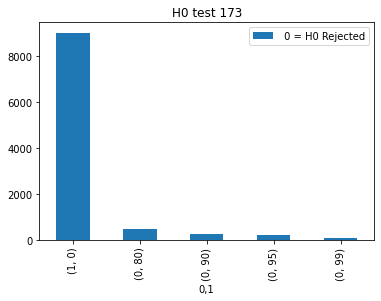

In [45]:
# Test Hypotesis

hzeros_array = pd.DataFrame([confidence(ztest(sample,value=173)) for sample in exp_sample_height])
total = hzeros_array.value_counts()
print(f"Total times H0 was not rejected [1, 0]: {total[1]}")
print(f"\nTotal times H0 was rejected and with which confidence [0, xx]: {total[0]}")

hzeros_array.value_counts().plot(kind='bar', label=" 0 = H0 Rejected", title='H0 test 173')
plt.legend()

6.  Replicate the previous point, testing $H_0 = 180$ against $H_1 \neq 180$. How many times have you accepted $H_0$? Can you link these results with the errors of type I and II?

Total times H0 was not rejected [1, 0]: 1
0    10000
dtype: int64


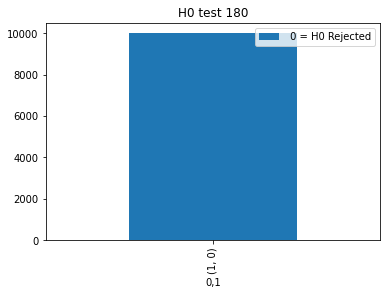

In [48]:
hzeros_array_2 = pd.DataFrame([confidence(ztest(sample,value=180)) for sample in exp_sample_height])
total_2 = hzeros_array_2.value_counts()
print(f"Total times H0 was not rejected [1, 0]: {total_2[1]}")
#print(f"\nTotal times H0 was rejected and with which confidence [0, xx]: {total_2[0]}")

hzeros_array_2.value_counts().plot(kind='bar', label=" 0 = H0 Rejected", title='H0 test 180')
plt.legend()

(Extra) 7. Test if the amount of outliers you have affects the final outcome of the test (for example, in section 5). You should face it like "is it more likely that I reject the null Hypothesis if I have more outliers?". It is an open exercise, so there is no "correct" way

HINT: Maybe this very last exercise makes more sense with only right-side outliers and the test suggested in *section 4.2*

In [229]:
# IN theory outliers do affect the mean and the standard deviation thus affecting the results of the test.-
# Copy to a new DataFrame
height2 = height.copy()

In [312]:
# Add lower outliers to upper outliers from minor fence 1.5 * IQR
height2.loc[(height2.minor_out==False), 'height'] = minor[1]

In [339]:
sample_height2 = height2.height.sample(50, replace=True)
zscore = ztest(sample_height2, value= 173)
zscore_larger = ztest(sample_height2, value= 173, alternative='larger')
print(f"Two-sided --> difference in means not equal to value: {zscore[1]}")
print(f"larger --> difference in means larger than value: {zscore_larger[1]}")

Two-sided --> difference in means not equal to value: 0.01202562469641606
larger --> difference in means larger than value: 0.00601281234820803
